In [1]:
import pandas as pd
import numpy as np
from magi_module_Copy import get_report
import matplotlib.pyplot as plt
from datetime import datetime
from pykrx import stock
%matplotlib inline

In [2]:
price_deviation = pd.read_csv('./price_deviation.csv', encoding = 'euc_kr')
price_deviation['tdate'] = pd.to_datetime(price_deviation['tdate'])
price_deviation = price_deviation.set_index('tdate').drop('Unnamed: 0', axis=1)

In [3]:
price_deviation.tail(10)

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,...,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387270.1,A387280
tdate,,,,,,,,,,,,,,,,,,,,,
2021-05-17,0.27,-0.07,-0.01,-0.00,0.78,0.01,-1.38,-0.04,0.05,0.34,...,-0.12,-4.13,-0.71,0.24,-0.02,0.33,0.58,NaN,NaN,NaN
2021-05-18,0.16,-0.07,0.22,-0.02,0.71,0.01,-1.33,-0.03,-0.13,-0.13,...,-0.82,0.87,0.82,0.39,0.01,-0.77,-0.74,NaN,NaN,NaN
2021-05-20,0.31,0.22,0.02,-0.04,0.90,-0.03,0.02,0.09,-0.14,-0.51,...,-0.08,-2.00,0.98,0.12,0.14,-0.26,-0.02,NaN,NaN,NaN
2021-05-21,0.13,-0.01,-0.03,0.09,0.59,0.03,-0.23,0.17,-0.00,-0.52,...,-0.27,0.25,1.58,0.17,0.01,-0.17,-0.16,NaN,NaN,NaN
2021-05-24,0.21,-0.10,0.43,0.03,0.50,-0.02,0.16,0.16,-0.27,-0.82,...,-0.27,-0.49,1.13,0.29,0.02,-0.10,0.04,NaN,NaN,NaN
2021-05-25,0.34,0.38,0.25,0.02,0.63,-0.00,-1.40,-0.05,0.17,-0.03,...,-0.71,-0.99,-1.10,0.27,0.13,-0.47,-0.50,-0.65,-0.65,-0.06
2021-05-26,0.24,-0.00,-0.04,0.04,0.61,-0.03,-0.93,0.08,0.07,-0.02,...,-0.40,1.40,0.07,0.32,0.12,-0.26,-0.32,-0.16,-0.16,-0.00
2021-05-27,0.07,-0.02,0.14,0.06,0.43,-0.01,-0.02,0.26,-0.14,0.57,...,0.01,-0.30,-0.12,0.04,0.25,0.25,-0.01,0.14,0.14,-0.14
2021-05-28,0.03,-0.02,-0.01,0.04,0.35,-0.02,0.31,-0.03,0.02,0.12,...,-0.14,-3.51,2.28,0.05,-0.00,-0.13,-0.29,0.25,0.25,-0.36


In [19]:
price_deviation.index

DatetimeIndex(['2006-06-27', '2006-06-28', '2006-06-29', '2006-06-30',
               '2006-07-03', '2006-07-04', '2006-07-05', '2006-07-06',
               '2006-07-07', '2006-07-10',
               ...
               '2021-05-17', '2021-05-18', '2021-05-20', '2021-05-21',
               '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27',
               '2021-05-28', '2021-05-31'],
              dtype='datetime64[ns]', name='tdate', length=3689, freq=None)

## 괴리율 전략 - Daily backtesting

In [21]:
target_start_date = '2018-12-31'
target_end_date = '2021-05-31' #29개월

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,0.495153,0.780330,1.089306,2.401158,5.739789,11.386802,7.777572
MDD,-0.549509,-0.379263,-0.358452,-0.251164,-0.228985,-0.056929,-0.044282
TURNOVER,335.261793,393.001412,418.800929,423.663596,352.629552,687.891346,598.257211
CAGR,-0.208872,-0.079354,0.028924,0.339081,0.790463,1.249748,0.981290
SHARPE,-0.378681,-0.146944,0.067073,0.520532,0.897499,1.611094,1.735601


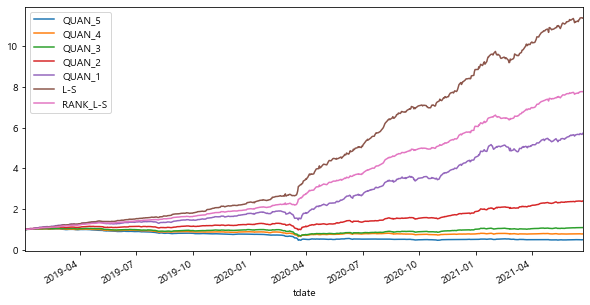

In [6]:
price_deviation_daily_score = price_deviation.loc[target_start_date : target_end_date]
daily_summary, daily_ress = get_report(price_deviation_daily_score)

daily_ress.plot(figsize = (10, 5))

daily_summary

## 괴리율 전략 - each two-day backtesting (first기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,0.729939,0.904517,1.357455,1.991286,3.274639,4.456747,3.695611
MDD,-0.469810,-0.354182,-0.286901,-0.272877,-0.262207,-0.066727,-0.035085
TURNOVER,237.499464,268.212366,279.511487,282.044217,249.531436,487.030900,299.947762
CAGR,-0.099614,-0.032898,0.107240,0.258089,0.484982,0.645657,0.546069
SHARPE,-0.173313,-0.048750,0.205056,0.402741,0.607358,1.088393,1.240273


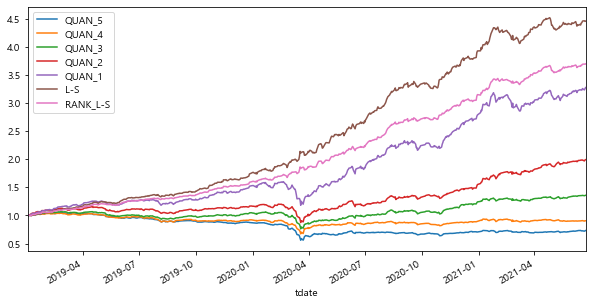

In [7]:
price_deviation_daily_score = price_deviation.resample('2D').first().loc[target_start_date : target_end_date]
daily_summary, daily_ress = get_report(price_deviation_daily_score)

daily_ress.plot(figsize = (10, 5))

daily_summary

## 괴리율 전략 - Weekly backtesting (종가기준)


,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.289867,1.283120,1.408553,1.540211,1.533367,1.182547,1.194849
MDD,-0.238864,-0.310303,-0.294481,-0.291045,-0.370298,-0.231162,-0.150071
TURNOVER,75.007780,86.514069,90.399846,90.578401,79.154037,154.161816,133.734431
CAGR,0.088550,0.086649,0.120962,0.154853,0.153140,0.057481,0.061136
SHARPE,0.181397,0.173700,0.217005,0.250708,0.230951,0.125082,0.166412


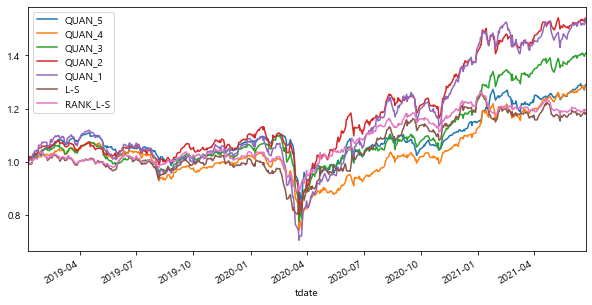

In [9]:

price_deviation_weekly_score = price_deviation.resample('W').last().loc[target_start_date : target_end_date]
weekly_summary, weekly_ress = get_report(price_deviation_weekly_score)

weekly_ress.plot(figsize = (10, 5))

weekly_summary

## 괴리율 전략 - Weekly backtesting (평균가 기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.385018,1.243317,1.244293,1.464905,1.744055,1.262459,1.250574
MDD,-0.246015,-0.281720,-0.322713,-0.327527,-0.329002,-0.210225,-0.172574
TURNOVER,62.763229,77.150342,88.333430,86.633075,66.666886,129.430115,106.621301
CAGR,0.114684,0.075294,0.075575,0.135716,0.203705,0.080785,0.077382
SHARPE,0.235988,0.170357,0.143832,0.216718,0.280937,0.171609,0.190659


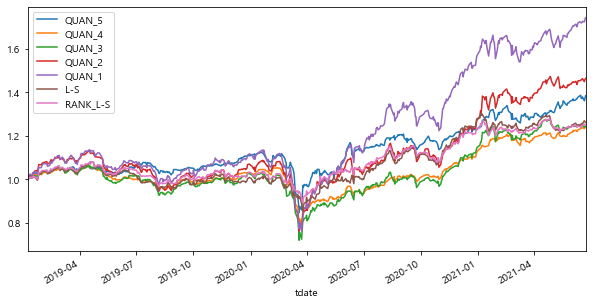

In [10]:
price_deviation_weekly_score = price_deviation.resample('W').mean().loc[target_start_date : target_end_date]
weekly_summary, weekly_ress = get_report(price_deviation_weekly_score)

weekly_ress.plot(figsize = (10, 5))

weekly_summary

## 괴리율 전략 - Weekly backtesting (first 기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.381547,1.403867,1.372764,1.423178,1.456282,1.041165,1.046633
MDD,-0.339040,-0.285743,-0.317815,-0.271800,-0.291578,-0.156030,-0.135706
TURNOVER,72.999387,85.027446,87.898030,89.011612,78.322205,151.321592,133.422882
CAGR,0.113752,0.119718,0.111387,0.124829,0.133483,0.013538,0.015309
SHARPE,0.200606,0.225183,0.201577,0.233877,0.210698,0.042443,0.051555


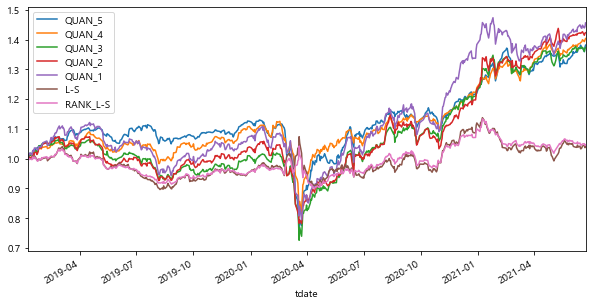

In [11]:
price_deviation_weekly_score = price_deviation.resample('W').first().loc[target_start_date : target_end_date]
weekly_summary, weekly_ress = get_report(price_deviation_weekly_score)

weekly_ress.plot(figsize = (10, 5))


weekly_summary

## 괴리율 전략 - Weekly backtesting (min 기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.305148,1.549732,1.342968,1.423928,1.517184,1.159701,1.084877
MDD,-0.309106,-0.311187,-0.279754,-0.283656,-0.325157,-0.113465,-0.099470
TURNOVER,12.314025,18.860846,20.534339,19.225553,14.806963,27.120988,21.323620
CAGR,0.092832,0.157228,0.103287,0.125026,0.149069,0.050627,0.027528
SHARPE,0.177113,0.288046,0.202762,0.221569,0.225061,0.128395,0.088442


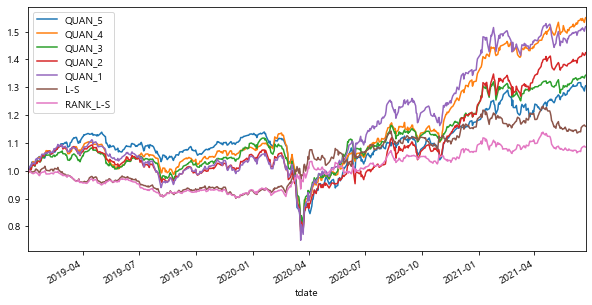

In [12]:
price_deviation_monthly_score = price_deviation.resample('M').min().loc[target_start_date : target_end_date]
monthly_summary, monthly_ress = get_report(price_deviation_monthly_score)

monthly_ress.plot(figsize = (10, 5))

monthly_summary

## 괴리율 전략 - Monthly backtesting (종가기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.309051,1.350306,1.476913,1.546007,1.453858,1.114219,1.118412
MDD,-0.233471,-0.256097,-0.327715,-0.319036,-0.347210,-0.160638,-0.127648
TURNOVER,19.618248,22.410893,20.418629,22.823473,19.427073,39.045321,33.648598
CAGR,0.093920,0.105293,0.138811,0.156300,0.132854,0.036709,0.038008
SHARPE,0.208905,0.212408,0.232667,0.250577,0.204150,0.091479,0.115606


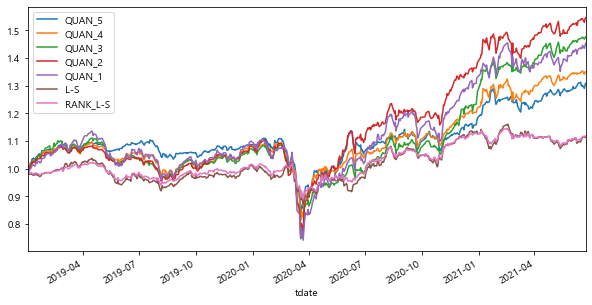

In [14]:
price_deviation_monthly_score = price_deviation.resample('M').last().loc[target_start_date : target_end_date]
monthly_summary, monthly_ress = get_report(price_deviation_monthly_score)

monthly_ress.plot(figsize = (10, 5))

monthly_summary

## 괴리율 전략 - Monthly backtesting (평균가 기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.287447,1.171620,1.495569,1.501334,1.710332,1.340766,1.335174
MDD,-0.240469,-0.243762,-0.272003,-0.387194,-0.350412,-0.173381,-0.195080
TURNOVER,11.958574,16.425897,20.020232,19.046744,13.671850,25.630423,19.852545
CAGR,0.087869,0.054214,0.143586,0.145053,0.195896,0.102684,0.101149
SHARPE,0.207162,0.141983,0.267359,0.199458,0.260215,0.201507,0.215398


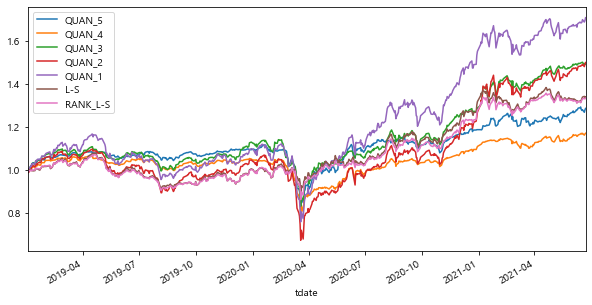

In [15]:
price_deviation_monthly_score = price_deviation.resample('M').mean().loc[target_start_date : target_end_date]
monthly_summary, monthly_ress = get_report(price_deviation_monthly_score)

monthly_ress.plot(figsize = (10, 5))

monthly_summary

## 괴리율 전략 - Monthly backtesting (first 기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.296774,1.092159,1.444131,1.599495,1.788813,1.370448,1.368993
MDD,-0.330374,-0.367579,-0.279229,-0.249111,-0.282545,-0.063345,-0.049623
TURNOVER,16.236133,21.297213,20.667400,20.840759,19.588955,35.825088,31.735256
CAGR,0.090489,0.029821,0.130322,0.169484,0.213915,0.110762,0.110368
SHARPE,0.174175,0.068722,0.241644,0.289700,0.312789,0.241961,0.312198


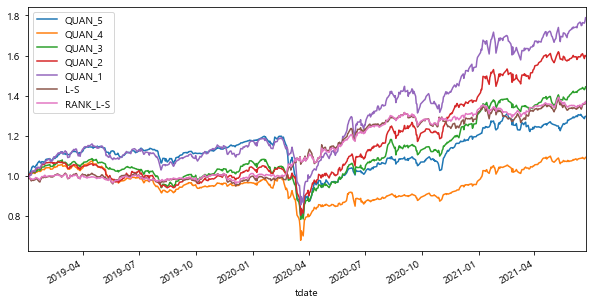

In [16]:
price_deviation_monthly_score = price_deviation.resample('M').first().loc[target_start_date : target_end_date]
monthly_summary, monthly_ress = get_report(price_deviation_monthly_score)

monthly_ress.plot(figsize = (10, 5))

monthly_summary

## 괴리율 전략 - Monthly backtesting (min 기준)

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.305148,1.549732,1.342968,1.423928,1.517184,1.159701,1.084877
MDD,-0.309106,-0.311187,-0.279754,-0.283656,-0.325157,-0.113465,-0.099470
TURNOVER,12.314025,18.860846,20.534339,19.225553,14.806963,27.120988,21.323620
CAGR,0.092832,0.157228,0.103287,0.125026,0.149069,0.050627,0.027528
SHARPE,0.177113,0.288046,0.202762,0.221569,0.225061,0.128395,0.088442


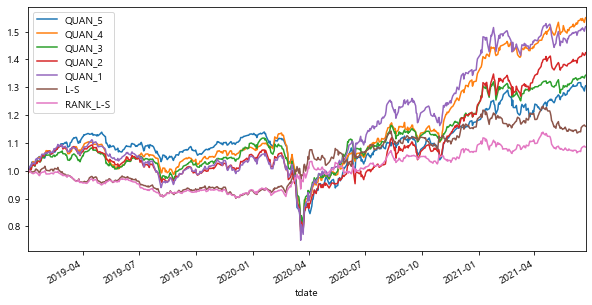

In [17]:
price_deviation_monthly_score = price_deviation.resample('M').min().loc[target_start_date : target_end_date]
monthly_summary, monthly_ress = get_report(price_deviation_monthly_score)

monthly_ress.plot(figsize = (10, 5))

monthly_summary